<a href="https://colab.research.google.com/github/BatalovaEvgeniya/HSE_ML_2018-2019/blob/master/pytorch_lesson_20201220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="4"></a> <br>
### Искусственная Нейронная Сеть/Artificial Neural Network (ANN)
- Логистическая регрессия позволяет решать задачу классификации.
- Точность логистической регрессии снижается с увеличением сложности(Не линейности) данных.
- Следовательно надо увеличить сложность модели.
- Чтобы увеличить сложность модели, надо добаваит нелинейные функции в качестве скрытого слоя.
- Сделаем предположение что увеличивая сложность нейронной сети добавляя скрытые слои модель сможет лучше адаптироваться. Это результирует в повышении точности.

- **Шаги для написания ANN:**
    1. Импортировать библиотеки
    1. Подготовить датасет
        - Тот же самый MNIST датасет что и на предыдущем занятии.
        - Напишем новый train_loader и test_loader 
    1. Создать ANN
        - Добавим 3 скрытых слоя.
        - Используем ReLU, Tanh и ELU активационные функции для разнообразия.
    1. Создать класс моделии
        - input_dim = 28х28 # размер изображения px*px
        - output_dim = 10  # классы 0,1,2,3,4,5,6,7,8,9
        - Размерность скрытого слоя - 150, но мы можем выбрать ее любую. Размерность скрытого слоя является одним из гиперпараметров которые необходимо настраивать и finetune в процессе работы над сетью. Одним из домашних заданий будет попробовать разные значения этого гиперпараметра и сравнить.
        - Создать модель
    1. Создать экземпляр Loss-функции
        - Cross entropy loss - Кросс энтропия
        - Добавим softmax(логистическая функция)
    1. Создать экземпляр оптимизатора
        - SGD() оптимизатор
    1. Обучить модель
    1. Сделать предсказание

- Подводя итоги мы можем увидеть с графика что с уменьшением loss функции, точность увеличивается и наша модель обучается. 
- Скрытые слои сделали нашу модель более точной и более обучаймой. В данной задаче в среднем она на 95% точнее чем логистическая регрессия.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My\ Drive/'OTUS. DL Basic'/HW_4

Mounted at /content/gdrive
/content/gdrive/My Drive/OTUS. DL Basic/HW_4


In [ ]:
# Импортируем библиотеки
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import numpy as np

from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

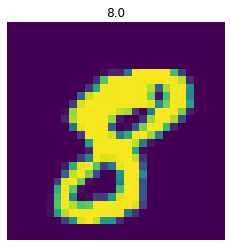

In [ ]:
# Подготовка датасета
# Загрузить данные
train = pd.read_csv(r"./train.csv",dtype = np.float32)

# Разобьем данные на пиксели(features) и классы на которые будем делить(цифры от 0 до 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # Нормализация

# train test split.  Размер тестовый = 0.2, соответсвенно тренировочный будет 0.8. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# Создадим feature и целевой тензор для тренировочного датасета.
# Для того чтобы переменные могли аккумулировать градиенты, мы должны создать тензор в котором они будут хранится.
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) 

# Аналогично для тестового датасета.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size == размер батча, epoch == количество эпох обучения и iteration == количество итераций
batch_size = 100
n_iters = 50
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Датасет в Pytorch 
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# создадим загрузчик данных в PyTorch - data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# Визуализируем одно из изображений
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [ ]:
# Импорт библиотек
import torch
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
# Создание ANN модели
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Линейная функция 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Не линейная функция 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Не линейная функция 3
        self.elu3 = nn.ELU()


        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.elu4 = nn.ELU()

        
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        self.elu5 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc6 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Линейная функция 1
        out = self.fc1(x)
        # Не линейная функция 1
        out = self.relu1(out)
        
        # Линейная функция 2
        out = self.fc2(out)
        # Не линейная функция 2
        out = self.tanh2(out)
        
        #Линейная функция 2
        out = self.fc3(out)
        # Не линейная функция 2
        out = self.elu3(out)


        out = self.fc4(out)
        out = self.elu4(out)

        out = self.fc5(out)
        out = self.elu5(out)
      
        # Линейная функция 4 (readout)
        out = self.fc6(out)
        return out

# Зададим параметры сети ANN
input_dim = 28*28
hidden_dim = 1000 #Размерности скрытых слоев это гиперпараметры которые настраиваются во время обучения. 150 было выбрано произвольно
output_dim = 10

# Создадим экземпляр ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Зададим loss функцию как кросс энтропию
error = nn.CrossEntropyLoss()

# SGD оптимизатор
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Обучение модели
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
lost_test_list = []
num_epochs = 100

for epoch in range(num_epochs):

  for i, (images, labels) in enumerate(train_loader):

      train = Variable(images.view(-1, 28*28))
      labels = Variable(labels)
      
      # Обнулим градиенты
      optimizer.zero_grad()
      
      # Проведем forward propagation
      outputs = model(train)
      
      # Посчитаем loss функцию 
      loss = error(outputs, labels)
      # Расчитаем градиенты
      loss.backward()
      
      # Обновим параметры сети
      optimizer.step()
      
      count += 1
      if count % 50 == 0:
    
      # Подсчет точности        
        correct = 0
        total = 0

      # Работа с тестовым датасетом
        for images, labels in test_loader:

            test = Variable(images.view(-1, 28*28))
          
            # Проведем Forward propagation
            outputs = model(test)
            lost_test  = error(outputs, labels)
            # Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]
            # Total number of labels
            total += len(labels)

          # Total correct predictions
            correct += (predicted == labels).sum()
      
            accuracy = 100 * correct / float(total) 
        
        
          
          # Сохраним loss и iteration
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)
        lost_test_list.append(lost_test)
      if count % 500 == 0:
          # Выведем Loss
          print('Iteration: {}  Loss: {}  Train Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 2.1742773056030273  Train Accuracy: 51.14285659790039 %
Iteration: 1000  Loss: 0.9700703620910645  Train Accuracy: 71.0952377319336 %
Iteration: 1500  Loss: 0.5135078430175781  Train Accuracy: 82.73809814453125 %
Iteration: 2000  Loss: 0.4276973605155945  Train Accuracy: 86.9047622680664 %
Iteration: 2500  Loss: 0.4032948315143585  Train Accuracy: 88.72618865966797 %
Iteration: 3000  Loss: 0.2019672393798828  Train Accuracy: 90.30952453613281 %
Iteration: 3500  Loss: 0.3041174113750458  Train Accuracy: 91.20237731933594 %
Iteration: 4000  Loss: 0.09533078223466873  Train Accuracy: 92.05952453613281 %
Iteration: 4500  Loss: 0.3726680874824524  Train Accuracy: 93.22618865966797 %
Iteration: 5000  Loss: 0.11996188759803772  Train Accuracy: 93.69047546386719 %
Iteration: 5500  Loss: 0.20289920270442963  Train Accuracy: 94.13095092773438 %
Iteration: 6000  Loss: 0.24507945775985718  Train Accuracy: 94.4047622680664 %
Iteration: 6500  Loss: 0.11524341255426407  Train Ac

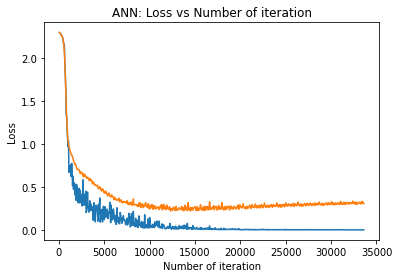

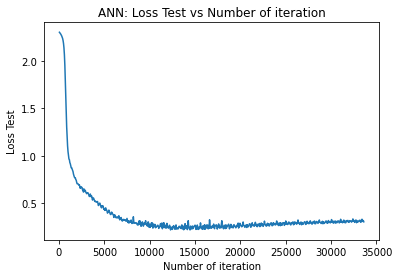

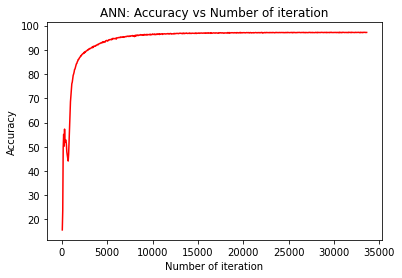

In [ ]:
# Визуализация loss 
plt.plot(iteration_list,loss_list)
plt.plot(iteration_list,lost_test_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

plt.plot(iteration_list,lost_test_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss Test")
plt.title("ANN: Loss Test vs Number of iteration")
plt.show()

# Визуализация accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()